# data loading

In [ ]:
import pandas as pd

# Load datasets
dataset1 = pd.read_csv('/content/politfact_data.csv')
dataset2 = pd.read_csv('/content/constraint_data.csv')

# Display the first few rows of each dataset
print("Dataset 1:")
print(dataset1.head())

print("\nDataset 2:")
print(dataset2.head())



Dataset 1:
                                           statement  value
0  "Hospitals murdered patients” with remdesivir,...      0
1  "Pfizer CEO Albert Bourla admitted yesterday t...      0
2  The 9th Circuit Court of Appeals “just ruled C...      0
3  The World Health Organization is discussing en...      0
4  COVID-19 “vaccine injuries exposed in newly un...      0

Dataset 2:
                                               tweet  label
0  The CDC currently reports 99031 deaths. In gen...      1
1  States reported 1121 deaths a small rise from ...      1
2  Politically Correct Woman (Almost) Uses Pandem...      0
3  #IndiaFightsCorona: We have 1524 #COVID testin...      1
4  Populous states can generate large case counts...      1


In [ ]:
# Rename the column
dataset1 = dataset1.rename(columns={'value': 'label'})

In [ ]:
# Rename the column
dataset2 = dataset2.rename(columns={'tweet': 'statement'})

In [ ]:
# Count values for 'label' column in each dataset
label_counts_dataset1 = dataset1['label'].value_counts()
label_counts_dataset2 = dataset2['label'].value_counts()

# Display counts
print("Label counts for Dataset 1:")
print(label_counts_dataset1)

print("\nLabel counts for Dataset 2:")
print(label_counts_dataset2)


Label counts for Dataset 1:
label
0    1307
1     252
Name: count, dtype: int64

Label counts for Dataset 2:
label
1    5600
0    5100
Name: count, dtype: int64


# DATASETS CLEANING

In [ ]:
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
DATASET2 = dataset2.copy()
DATASET1= dataset1.copy()



show datasets before cleaning

In [ ]:
# Set display options to show full text
pd.set_option('display.max_colwidth', None)
print(dataset1.head(20))


                                                                                                                                                                                 statement  \
0                                                                               "Hospitals murdered patients” with remdesivir, a drug banned from Ebola trials because of “53% kill rate.”   
1                                                                                                             "Pfizer CEO Albert Bourla admitted yesterday that Covid was used as a test.”   
2                                                                                                       The 9th Circuit Court of Appeals “just ruled Covid vax mandates unconstitutional.”   
3                                                                                                                  The World Health Organization is discussing ending the First Amendment.   
4                                                 

In [ ]:
dataset2.head(20)

,statement,label
0,The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.,1
1,States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths. https://t.co/YASGRTT4ux,1
2,Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag https://t.co/thF8GuNFPe #coronavirus #nashville,0
3,#IndiaFightsCorona: We have 1524 #COVID testing laboratories in India and as on 25th August 2020 36827520 tests have been done : @ProfBhargava DG @ICMRDELHI #StaySafe #IndiaWillWin https://t.co/Yh3ZxknnhZ,1
4,Populous states can generate large case counts but if you look at the new cases per million today 9 smaller states are showing more cases per million than California or Texas: AL AR ID KS KY LA MS NV and SC. https://t.co/1pYW6cWRaS,1
5,"Covid Act Now found ""on average each person in Illinois with COVID-19 is infecting 1.11 other people. Data shows that the infection growth rate has declined over time this factors in the stay-at-home order and other restrictions put in place."" https://t.co/hhigDd24fE",1
6,If you tested positive for #COVID19 and have no symptoms stay home and away from other people. Learn more about CDC’s recommendations about when you can be around others after COVID-19 infection: https://t.co/z5kkXpqkYb. https://t.co/9PaMy0Rxaf,1
7,Obama Calls Trump’s Coronavirus Response A Chaotic Disaster https://t.co/DeDqZEhAsB,0
8,"???Clearly, the Obama administration did not leave any kind of game plan for something like this.??�",0
9,Retraction—Hydroxychloroquine or chloroquine with or without a macrolide for treatment of COVID-19: a multinational registry analysis - The Lancet https://t.co/L5V2x6G9or,0


cleaning functions

In [ ]:
# Function to remove HTML contents
def remove_html(statement):
    soup = BeautifulSoup(statement, "html.parser")
    return soup.get_text()

# Function to remove punctuation marks
def remove_punctuations(statement):
    return re.sub('\[[^]]*\]', '', statement)

# Function to remove special characters
def remove_characters(statement):
    return re.sub("[^a-zA-Z]"," ", statement)

# Function to remove stopwords and perform lemmatization
def remove_stopwords_and_lemmatization(statement):
    final_statement = []
    statement = statement.lower()
    statement = nltk.word_tokenize(statement)

    for word in statement:
        if word not in set(stopwords.words('english')):
            lemma = nltk.WordNetLemmatizer()
            word = lemma.lemmatize(word)
            final_statement.append(word)
    return " ".join(final_statement)

# Total cleaning function
def cleaning(statement):
    statement = remove_html(statement)
    statement = remove_punctuations(statement)
    statement = remove_characters(statement)
    statement = remove_stopwords_and_lemmatization(statement)
    statement = to_lowercase(statement)
    return statement

def remove_urls(text):
    url_pattern = re.compile(r'http\S+|www\S+|https\S+', re.IGNORECASE)
    return url_pattern.sub(r'', text)

# Function to convert text to lowercase
def to_lowercase(text):
    return text.lower()

def remove_http_and_following(text):
    # Compile the regex pattern
    pattern = re.compile(r'http.*', re.IGNORECASE)
    # Substitute the matched text with an empty string
    return pattern.sub('', text)

# Function to remove hashtags and mentions
def remove_hashtags_mentions(text):
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    return text

# Function to remove special characters and HTML entities
def clean_text(text):
    # Remove HTML entities
    text = BeautifulSoup(text, "html.parser").text
    # Remove special characters and extra spaces
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text



# Apply the cleaning and URL removal functions on the 'statement' column of Dataset2
DATASET2['statement'] = DATASET2['statement'].apply(remove_urls)
DATASET2['statement'] = DATASET2['statement'].apply(cleaning)
DATASET2['statement'] = DATASET2['statement'].apply(remove_http_and_following)
DATASET2['statement'] = DATASET2['statement'].apply(clean_text)
DATASET2['statement'] = DATASET2['statement'].apply(remove_hashtags_mentions)

DATASET1['statement'] = DATASET1['statement'].apply(remove_urls)
DATASET1['statement'] = DATASET1['statement'].apply(cleaning)

<ipython-input-25-3e0e80dd6d20>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(statement, "html.parser")


dataset after cleaning

In [ ]:
DATASET2.head(50)

,statement,label
0,cdc currently report death general discrepancy death count different source small explicable death toll stand roughly people today,1
1,state reported death small rise last tuesday southern state reported death,1
2,politically correct woman almost us pandemic excuse reuse plastic bag coronavirus nashville,0
3,indiafightscorona covid testing laboratory india th august test done profbhargava dg icmrdelhi staysafe indiawillwin,1
4,populous state generate large case count look new case per million today smaller state showing case per million california texas al ar id k ky la m nv sc,1
5,covid act found average person illinois covid infecting people data show infection growth rate declined time factor stay home order restriction put place,1
6,tested positive covid symptom stay home away people learn cdc recommendation around others covid infection,1
7,obama call trump coronavirus response chaotic disaster,0
8,clearly obama administration leave kind game plan something like,0
9,retraction hydroxychloroquine chloroquine without macrolide treatment covid multinational registry analysis lancet,0


In [ ]:
DATASET1.head(50)

,statement,label
0,hospital murdered patient remdesivir drug banned ebola trial kill rate,0
1,pfizer ceo albert bourla admitted yesterday covid used test,0
2,th circuit court appeal ruled covid vax mandate unconstitutional,0
3,world health organization discussing ending first amendment,0
4,covid vaccine injury exposed newly uncovered data,0
5,notice new jersey doctor office prof covid vaccine dangerous athlete,0
6,world health organization pandemic accord would take away american sovereignty give power put legally binding policy america case another pandemic,0
7,say donald trump told american inject bleach take shot uv light,0
8,study found sunbathing increase risk heart disease cover side effect vax,0
9,al cdc lo le tom o estar de acuerdo con te rico de la conspiraci n que dijeron en que covid e menos como la gripe,0


# EXLORATORY DATA ANALYSIS

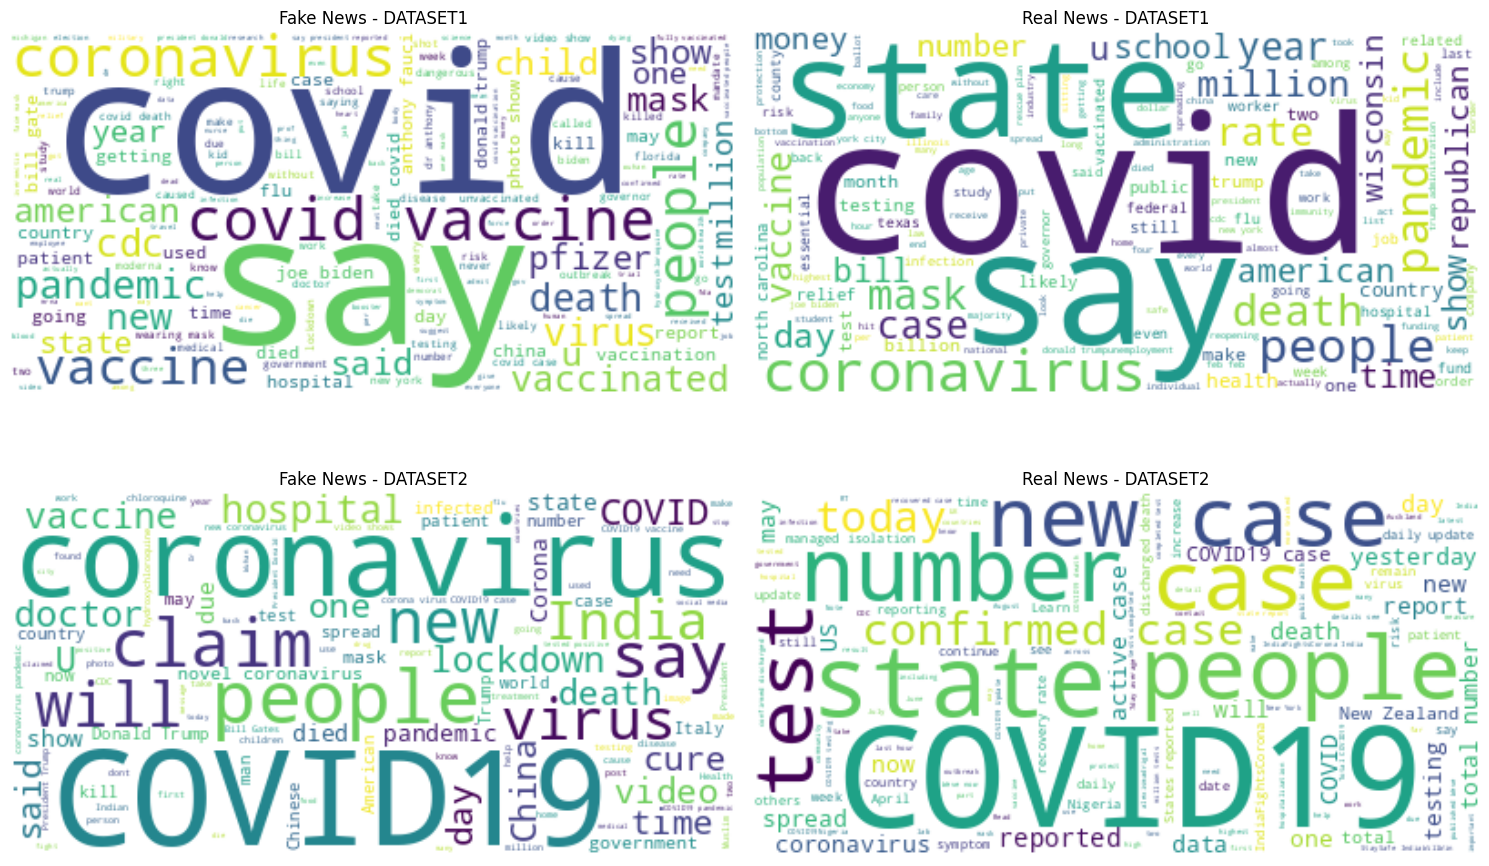

In [ ]:
# Function to generate word cloud
def generate_wordcloud(text):
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text)
    return wordcloud

# Filter and concatenate text for DATASET1
fake_news_text_dataset1 = ' '.join(DATASET1[DATASET1['label'] == 0]['statement'])
real_news_text_dataset1 = ' '.join(DATASET1[DATASET1['label'] == 1]['statement'])

# Filter and concatenate text for DATASET2
fake_news_text_dataset2 = ' '.join(DATASET2[DATASET2['label'] == 0]['statement'])
real_news_text_dataset2 = ' '.join(DATASET2[DATASET2['label'] == 1]['statement'])

# Generate word clouds
wordcloud_fake_dataset1 = generate_wordcloud(fake_news_text_dataset1)
wordcloud_real_dataset1 = generate_wordcloud(real_news_text_dataset1)
wordcloud_fake_dataset2 = generate_wordcloud(fake_news_text_dataset2)
wordcloud_real_dataset2 = generate_wordcloud(real_news_text_dataset2)

# Plot word clouds side by side
plt.figure(figsize=(15, 10))

# Dataset 1 Fake News
plt.subplot(2, 2, 1)
plt.imshow(wordcloud_fake_dataset1, interpolation='bilinear')
plt.axis('off')
plt.title('Fake News - DATASET1')

# Dataset 1 Real News
plt.subplot(2, 2, 2)
plt.imshow(wordcloud_real_dataset1, interpolation='bilinear')
plt.axis('off')
plt.title('Real News - DATASET1')

# Dataset 2 Fake News
plt.subplot(2, 2, 3)
plt.imshow(wordcloud_fake_dataset2, interpolation='bilinear')
plt.axis('off')
plt.title('Fake News - DATASET2')

# Dataset 2 Real News
plt.subplot(2, 2, 4)
plt.imshow(wordcloud_real_dataset2, interpolation='bilinear')
plt.axis('off')
plt.title('Real News - DATASET2')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Combine text for each label in both datasets
def get_combined_text(dataset, label):
    return ' '.join(dataset[dataset['label'] == label]['statement'])

# Preprocess and extract the most common words
def get_most_common_words(text, top_n=10):
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 1))
    X = vectorizer.fit_transform([text])
    word_freq = X.sum(axis=0).A1
    words = vectorizer.get_feature_names_out()
    freq_dict = dict(zip(words, word_freq))
    sorted_words = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)
    return sorted_words[:top_n]

# Extract text data for fake and real news in both datasets
fake_news_text_dataset1 = get_combined_text(DATASET1, 0)
real_news_text_dataset1 = get_combined_text(DATASET1, 1)
fake_news_text_dataset2 = get_combined_text(DATASET2, 0)
real_news_text_dataset2 = get_combined_text(DATASET2, 1)

# Get most common words
top_words_fake_dataset1 = get_most_common_words(fake_news_text_dataset1)
top_words_real_dataset1 = get_most_common_words(real_news_text_dataset1)
top_words_fake_dataset2 = get_most_common_words(fake_news_text_dataset2)
top_words_real_dataset2 = get_most_common_words(real_news_text_dataset2)

# Print results
print("Most common words in fake news - DATASET1:", top_words_fake_dataset1)
print("Most common words in real news - DATASET1:", top_words_real_dataset1)
print("Most common words in fake news - DATASET2:", top_words_fake_dataset2)
print("Most common words in real news - DATASET2:", top_words_real_dataset2)

Most common words in fake news - DATASET1: [('covid', 550), ('vaccine', 328), ('say', 259), ('people', 179), ('coronavirus', 175), ('mask', 97), ('death', 84), ('vaccinated', 79), ('pandemic', 68), ('virus', 67)]
Most common words in real news - DATASET1: [('covid', 77), ('say', 52), ('state', 40), ('coronavirus', 35), ('people', 25), ('pandemic', 23), ('trump', 20), ('death', 19), ('mask', 18), ('rate', 17)]
Most common words in fake news - DATASET2: [('coronavirus', 1861), ('covid19', 1851), ('people', 498), ('virus', 382), ('new', 365), ('trump', 359), ('vaccine', 340), ('says', 322), ('pandemic', 321), ('video', 312)]
Most common words in real news - DATASET2: [('covid19', 3191), ('cases', 2548), ('new', 1448), ('tests', 1088), ('deaths', 878), ('total', 855), ('states', 849), ('number', 803), ('people', 767), ('confirmed', 739)]


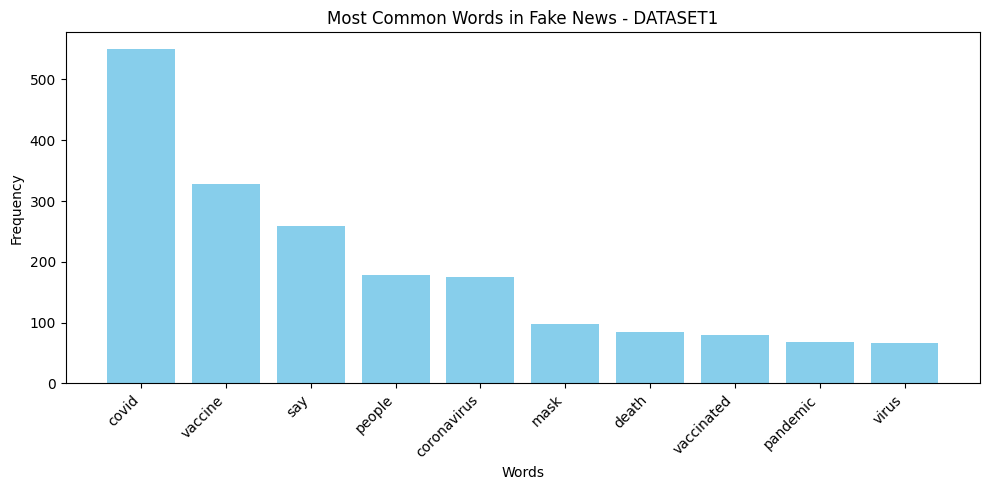

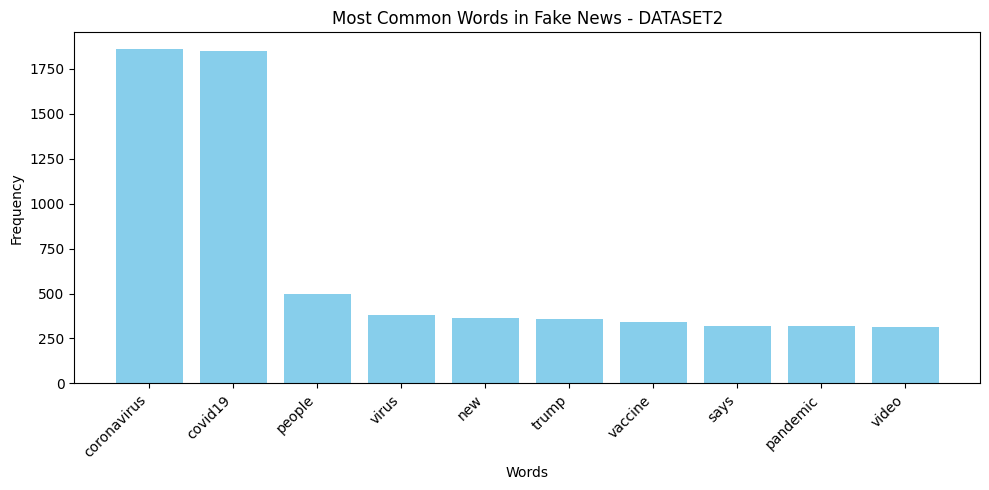

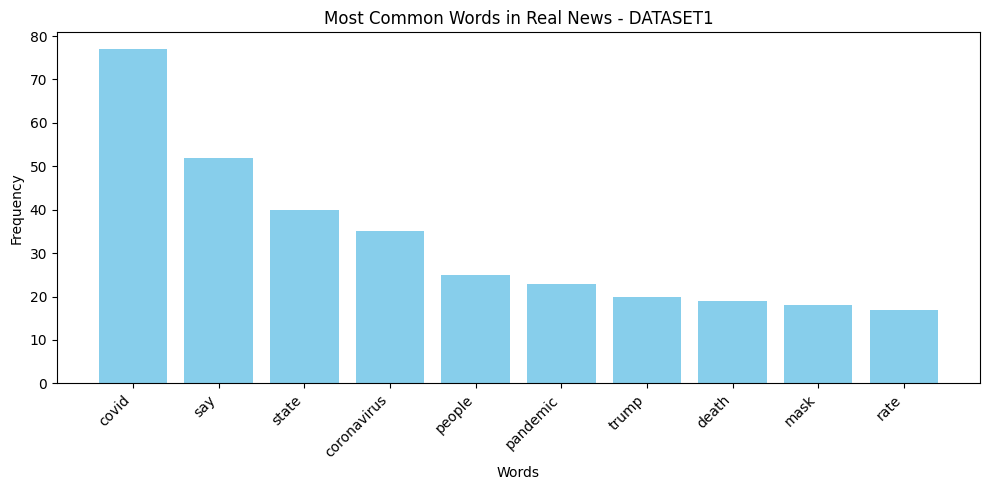

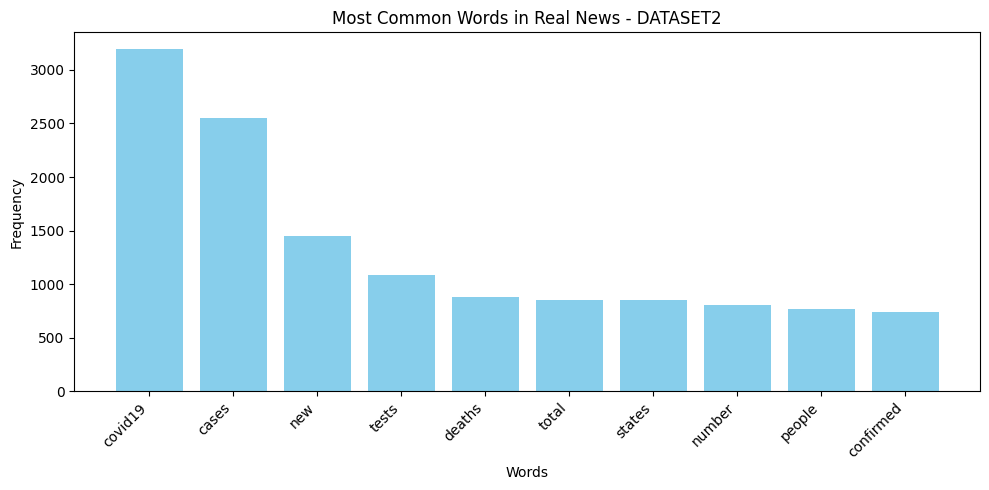

In [ ]:
def plot_word_frequencies(word_freqs, title):
    words, counts = zip(*word_freqs)
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot word frequencies
plot_word_frequencies(top_words_fake_dataset1, 'Most Common Words in Fake News - DATASET1')
plot_word_frequencies(top_words_fake_dataset2, 'Most Common Words in Fake News - DATASET2')
plot_word_frequencies(top_words_real_dataset1, 'Most Common Words in Real News - DATASET1')
plot_word_frequencies(top_words_real_dataset2, 'Most Common Words in Real News - DATASET2')

# data merging

In [ ]:
from sklearn.utils import shuffle
# Merge DATASET1 and DATASET2(cleaned data for cnnand lstm models)
DATASET3 = pd.concat([DATASET1, DATASET2], ignore_index=True)
# Shuffle the rows to randomize the order
DATASET3 = shuffle(DATASET3, random_state=42)
DATASET3.head(50)

,statement,label
2536,tanzanian club spokesman haji manara infected covid tour netherlands,0
1210,dr fauci sat microsoft board director,0
7782,news uk safe coronavirus boris johnson order well painted red bus,0
11932,vaping reduce chance getting coronavirus,0
4901,eu echo canada dfid uk joined force support belize improving diagnostic training capacity providing crucial equipment supply covid whoimpact,1
10803,thakur cdsco india inf spkalantri sir infected mid august covid suffering day prescribed favipiravir fabiflu cured hour symptom gone fully recovered day,0
9289,anyone interested rise fascism globally everyone read report amaramarasingam hindu nationalist use covid spread anti muslim hate violence,0
11521,rock group knack make come back remake sharona corona coronavirus song theknack,0
8170,situation coronainpakistan,0
8021,public health professional need covid resource sharing check cdc one stop shop covid resource range youth sport travel,1


In [ ]:
# Merge DATASET1 and DATASET2(unlceaned to be used by bert)
dataset3 = pd.concat([dataset1, dataset2], ignore_index=True)
# Shuffle the rows to randomize the order
dataset3 = shuffle(dataset3, random_state=42)
dataset3.head(50)

,statement,label
2536,Tanzanian club spokesman Haji S. Manara was infected with COVID-19 during his tour of The Netherlands.,0
1210,“Dr. Fauci sat on Microsoft’s board of directors.”,0
7782,NEWS! UK safe from coronavirus as Boris Johnson orders “All is well” to be painted on red buses https://t.co/JAHcyw4TgQ https://t.co/v1gGyG5M6Y,0
11932,Does vaping reduce your chances of getting the coronavirus?,0
4901,WHO @eu_echo @Canada &amp; @DFID_UK joined forces to support Belize 🇧🇿 in improving its diagnostic &amp; training capacity and providing crucial equipment &amp; supplies during #COVID19. 👉https://t.co/GjisuK6g4w #WHOImpact https://t.co/vipc38ReWZ,1
10803,@d_s_thakur @CDSCO_INDIA_INF @spkalantri Sir i was infected in mid August of covid 19 and after suffering for 8 days was prescribed for Favipiravir fabiflu and was cured.\nIn 36 hours most of my symptoms were gone fully recovered in 7 days,0
9289,Anyone interested in rise of fascism globally (and that should be everyone) should read this report by @AmarAmarasingam on how Hindu nationalists use Covid-19 to spread anti-Muslim hate and violence.\nhttps://t.co/05YYjtytuW,0
11521,"1980's Rock Group ""The Knack"" Make Come Back with Remake of My Sharona as My Corona https://t.co/xkDHjLxLdm #coronavirus #songs #theknack",0
8170,Situation is 😭. #CoronaInPakistan https://t.co/eBIY6UCPgb,0
8021,Public Health Professionals: Need #COVID19 resources for sharing? Check out CDC’s One-Stop Shop for COVID-19 Resources that range from youth sports to travel: https://t.co/EpQe5KaDvq. https://t.co/CLv3Qj3ZeJ,1


In [ ]:
# Save the shuffled DataFrame to a CSV file
dataset3.to_csv('dataset3.csv', index=False)
DATASET3.to_csv('DATASET3.csv', index=False)